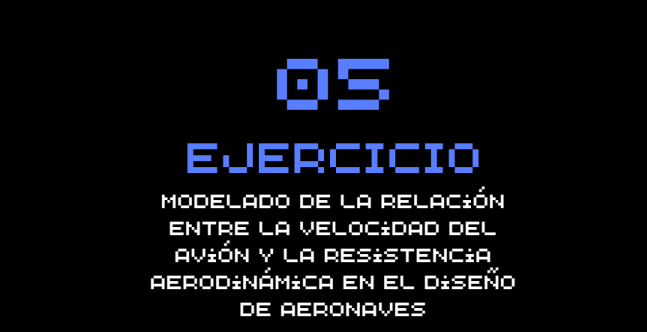
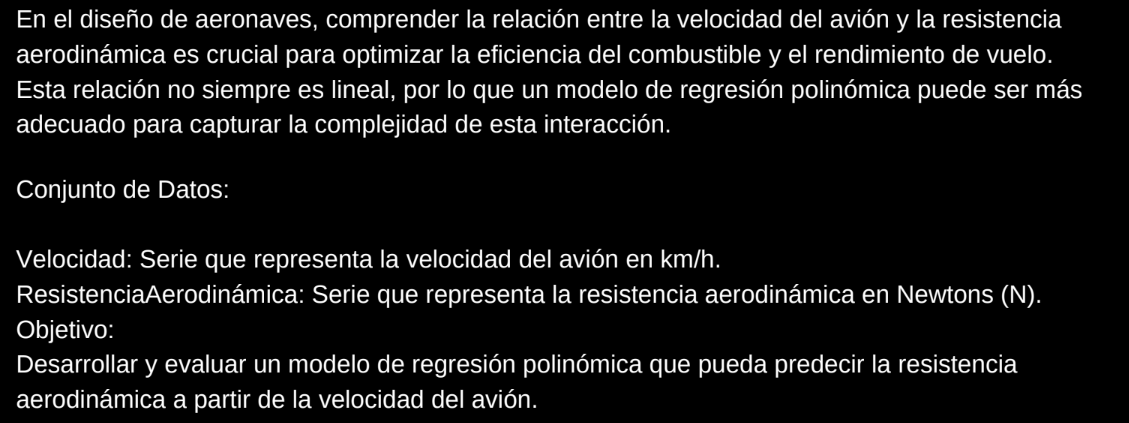
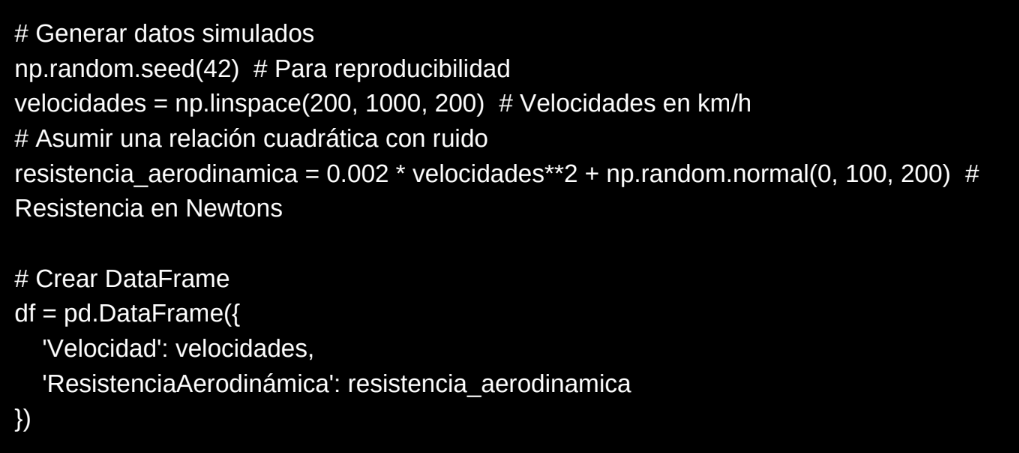

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Generar datos simulados
np.random.seed(42)  # Para reproducibilidad
velocidades = np.linspace(200, 1000, 200)  # Velocidades en km/h
# Asumir una relación cuadrática con ruido
resistencia_aerodinamica = 0.002 * velocidades**2 + np.random.normal(0, 100, 200)  # Resistencia en Newtons

# Crear DataFrame
df = pd.DataFrame({
    'Velocidad': velocidades,
    'ResistenciaAerodinámica': resistencia_aerodinamica
})

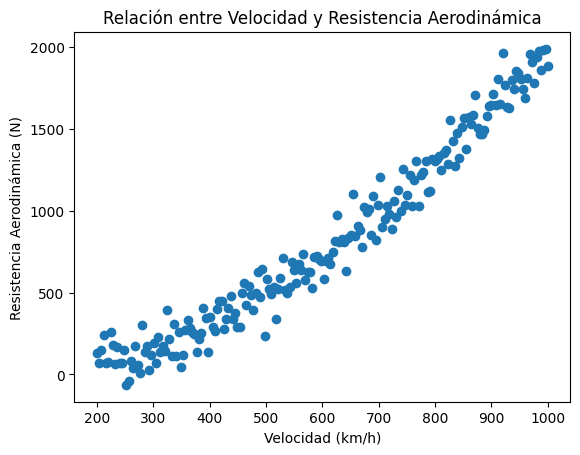

In [8]:
# Visualizar la relación entre Velocidad y Resistencia Aerodinámica
plt.scatter(df['Velocidad'], df['ResistenciaAerodinámica'])
plt.title('Relación entre Velocidad y Resistencia Aerodinámica')
plt.xlabel('Velocidad (km/h)')
plt.ylabel('Resistencia Aerodinámica (N)')
plt.show()

In [9]:
# Análisis de correlación
print("Correlación entre variables:")
print(df.corr())


Correlación entre variables:
                         Velocidad  ResistenciaAerodinámica
Velocidad                   1.0000                   0.9736
ResistenciaAerodinámica     0.9736                   1.0000


In [10]:
# Preparar los datos para el modelo de regresión polinómica
X = df['Velocidad'].values.reshape(-1, 1)  # Cambiar la forma para sklearn, agreagar una columna de "unos"
y = df['ResistenciaAerodinámica'].values

In [11]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Transformar las características para la regresión polinómica
poly = PolynomialFeatures(degree=2) #regresion polinomica de grado 2
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


In [13]:
# Crear y entrenar el modelo de regresión polinómica
modelo = LinearRegression()
modelo.fit(X_train_poly, y_train)

LinearRegression()

In [14]:
# Predecir y evaluar el modelo
y_pred = modelo.predict(X_test_poly)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Evaluación del Modelo:")
print("MSE (Error Cuadrático Medio):", mse)
print("R² (Coeficiente de Determinación):", r2)


Evaluación del Modelo:
MSE (Error Cuadrático Medio): 7748.098766183165
R² (Coeficiente de Determinación): 0.971788313608244


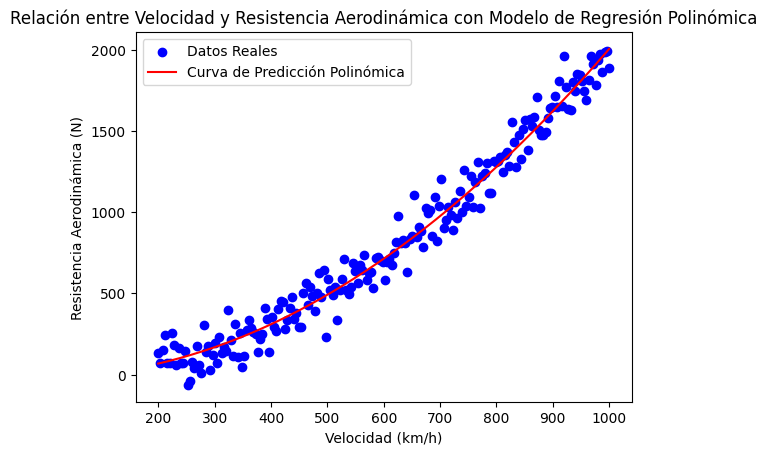

In [15]:
# Visualizar las predicciones del modelo y compararlas con los datos reales
plt.scatter(X, y, color='blue', label='Datos Reales')
X_range = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
y_range_pred = modelo.predict(poly.transform(X_range))
plt.plot(X_range, y_range_pred, color='red', label='Curva de Predicción Polinómica')
plt.title('Relación entre Velocidad y Resistencia Aerodinámica con Modelo de Regresión Polinómica')
plt.xlabel('Velocidad (km/h)')
plt.ylabel('Resistencia Aerodinámica (N)')
plt.legend()
plt.show()

In [16]:
# Mostrar los coeficientes del modelo
print("Coeficientes del modelo:")
print(f"Intercepto: {modelo.intercept_}")
print(f"Coeficientes: {modelo.coef_}")

Coeficientes del modelo:
Intercepto: -12.999787163932865
Coeficientes: [ 0.         -0.00233248  0.00201951]
